* My Drive/GitHub/transmission_ms/coalescence_time.ipynb
* Checked in working order 6 Nov 2022

In [1]:
# Create a path to \\GitHub\\transmission_ms
# .. which contains the definitive version of coalestr.py
# .. this is not necessary when working within \\GitHub\\transmission_ms
import sys
sys.path.insert(0, 'C:\\Users\\dominic\\H_Drive\\My Drive\\GitHub\\transmission_ms')

In [2]:
import coalestr as cs
import matplotlib.pyplot as plt

In [3]:
N = 300       # Effective number of hosts
Q = 5        # Quantum of transmission
X = 0.5      # Crossing rate of transmission chains
duration = 50000

history = [[duration, N, Q, X, 0]]
my_village = cs.Population(history)
my_village.get_coalescent(show = True)

Observation time.    Events captured.   Mean coalescence time
                      beho      wiho        beho     wiho
        0             100.0     100.0       637.3    421.7


In [4]:
b_separated = my_village.beho_lineage[:, 0]
b_cotransmitted = my_village.beho_lineage[:, 1]
b_coalesced = my_village.beho_lineage[:, 2]

w_separated = my_village.wiho_lineage[:, 0]
w_cotransmitted = my_village.wiho_lineage[:, 1]
w_coalesced = my_village.wiho_lineage[:, 2]

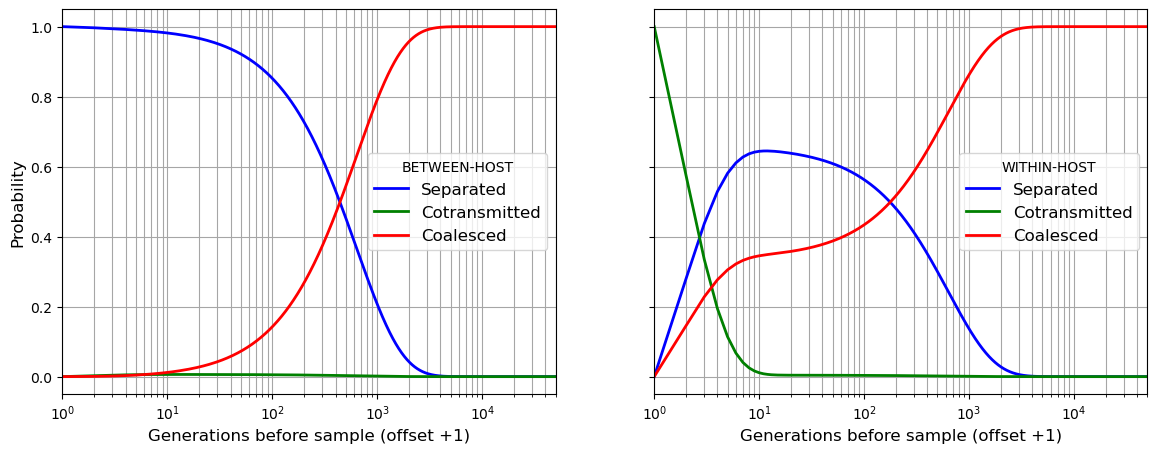

In [5]:
# in this figure the time axis has a log scale
# .. which requires that we offset the axis by 1
# .. so we pretend that alleles are sampled at bt = 1

timescale = range(1, my_village.t_his + 1)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5), sharex = True, sharey = True)

ax1.plot(timescale, b_separated, marker='', color='blue', linewidth = 2, label="Separated")
ax1.plot(timescale, b_cotransmitted, marker='', color='green', linewidth = 2, label="Cotransmitted")
ax1.plot(timescale, b_coalesced, marker='', color='red', linewidth = 2, label="Coalesced")

ax2.plot(timescale, w_separated, marker='', color='blue', linewidth = 2, label="Separated")
ax2.plot(timescale, w_cotransmitted, marker='', color='green', linewidth = 2, label="Cotransmitted")
ax2.plot(timescale, w_coalesced, marker='', color='red', linewidth = 2, label="Coalesced")

ax1.legend(title="BETWEEN-HOST",frameon=True, fontsize=12)
ax2.legend(title="WITHIN-HOST",frameon=True, fontsize=12)
ax1.set_xlabel("Generations before sample (offset +1)", fontsize=12)
ax2.set_xlabel("Generations before sample (offset +1)", fontsize=12)
ax1.set_ylabel("Probability", fontsize=12)
ax1.set_xscale('log',base=10)
ax1.set_xlim(1,my_village.t_his)
ax1.grid(visible=True, which='both', color='0.65', linestyle='-')
ax2.grid(visible=True, which='both', color='0.65', linestyle='-')

plt.show()

In [6]:
history_1 = [[10000, 100, 1, 0, 0]]
village_1 = cs.Population(history_1)
village_1.get_coalescent(show = True)

Observation time.    Events captured.   Mean coalescence time
                      beho      wiho        beho     wiho
        0             100.0     100.0       100.0      1.0


In [7]:
history_2 = [[10000, 100, 2, 0.5, 0]]
village_2 = cs.Population(history_2)
village_2.get_coalescent(show = True)

Observation time.    Events captured.   Mean coalescence time
                      beho      wiho        beho     wiho
        0             100.0     100.0       134.3     68.7


In [8]:
history_3 = [[10000, 100, 10, 1, 0]]
village_3 = cs.Population(history_3)
village_3.get_coalescent(show = True)

Observation time.    Events captured.   Mean coalescence time
                      beho      wiho        beho     wiho
        0             100.0     100.0       582.7    536.3


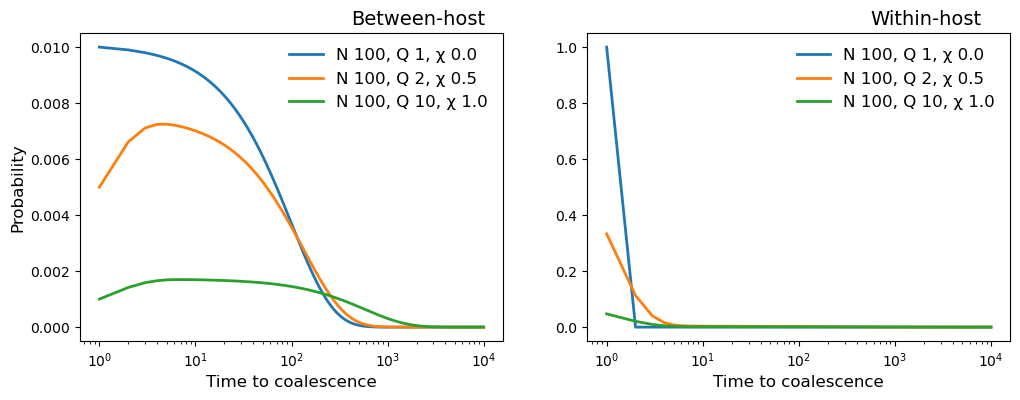

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,4), sharex = True)

for example in [village_1, village_2, village_3]:
    
    N = example.parameters[0,0]
    Q = example.parameters[0,1]
    X = example.parameters[0,2]
    
    timescale = range(1, example.t_his)
    beho_coalescent = example.coalescent[0, 1:, 0]
    wiho_coalescent = example.coalescent[0, 1:, 1]

    ax1.plot(timescale, beho_coalescent, marker='', linewidth=2, label=
        "N {0:.0f}, Q {1:.0f}, \u03C7 {2:.1f}".format(N, Q, X))
    
    ax2.plot(timescale, wiho_coalescent, marker='', linewidth=2, label=
        "N {0:.0f}, Q {1:.0f}, \u03C7 {2:.1f}".format(N, Q, X))
    
ax1.set_title("Between-host", position=(0.8, 0.3), fontsize=14)
ax2.set_title("Within-host", position=(0.8, 0.3), fontsize=14)
ax1.set_xlabel("Time to coalescence", fontsize=12)
ax2.set_xlabel("Time to coalescence", fontsize=12)
ax1.set_ylabel("Probability", fontsize=12)
ax1.set_xscale('log',base=10)
ax1.legend(frameon=False, fontsize=12)
ax2.legend(frameon=False, fontsize=12)

plt.show()

In [10]:
view_past_generations = 5

print("Sample two alleles from different hosts\n")
print("Generations    -------Probability distribution------")
print("back in time   Separated   Cotransmitted   Coalesced")

for i in range(view_past_generations + 1):
    separated = my_village.beho_lineage[i,0]
    cotransmitted = my_village.beho_lineage[i,1]
    coalesced = my_village.beho_lineage[i,2]
    
    print("{0:6d}{1:16.2f}{2:13.2f}{3:14.2f}".format(
        i,
        separated,
        cotransmitted,
        coalesced ))

Sample two alleles from different hosts

Generations    -------Probability distribution------
back in time   Separated   Cotransmitted   Coalesced
     0            1.00         0.00          0.00
     1            1.00         0.00          0.00
     2            0.99         0.00          0.00
     3            0.99         0.01          0.00
     4            0.99         0.01          0.00
     5            0.99         0.01          0.01


In [11]:
print("Sample two alleles from the same host\n")
print("Generations    -------Probability distribution------")
print("back in time   Separated   Cotransmitted   Coalesced")

for i in range(view_past_generations + 1):
    separated = my_village.wiho_lineage[i,0]
    cotransmitted = my_village.wiho_lineage[i,1]
    coalesced = my_village.wiho_lineage[i,2]
    
    print("{0:6d}{1:16.2f}{2:13.2f}{3:14.2f}".format(
        i,
        separated,
        cotransmitted,
        coalesced ))

Sample two alleles from the same host

Generations    -------Probability distribution------
back in time   Separated   Cotransmitted   Coalesced
     0            0.00         1.00          0.00
     1            0.28         0.58          0.14
     2            0.44         0.33          0.23
     3            0.53         0.19          0.28
     4            0.58         0.11          0.31
     5            0.61         0.07          0.32
